<a href="https://colab.research.google.com/github/KoMurase/FNC/blob/master/FNC_datavis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = "/content/drive/My Drive/FNC/dataset/fake news detection(FakeNewsNet)"

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv(path + "/fnn_train.csv")
val = pd.read_csv(path + "/fnn_dev.csv")

In [4]:
train.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake


In [5]:
def length(text):
  return len(text.split(' ') )

In [6]:
train["length"] = train["fullText_based_content"].apply(length)

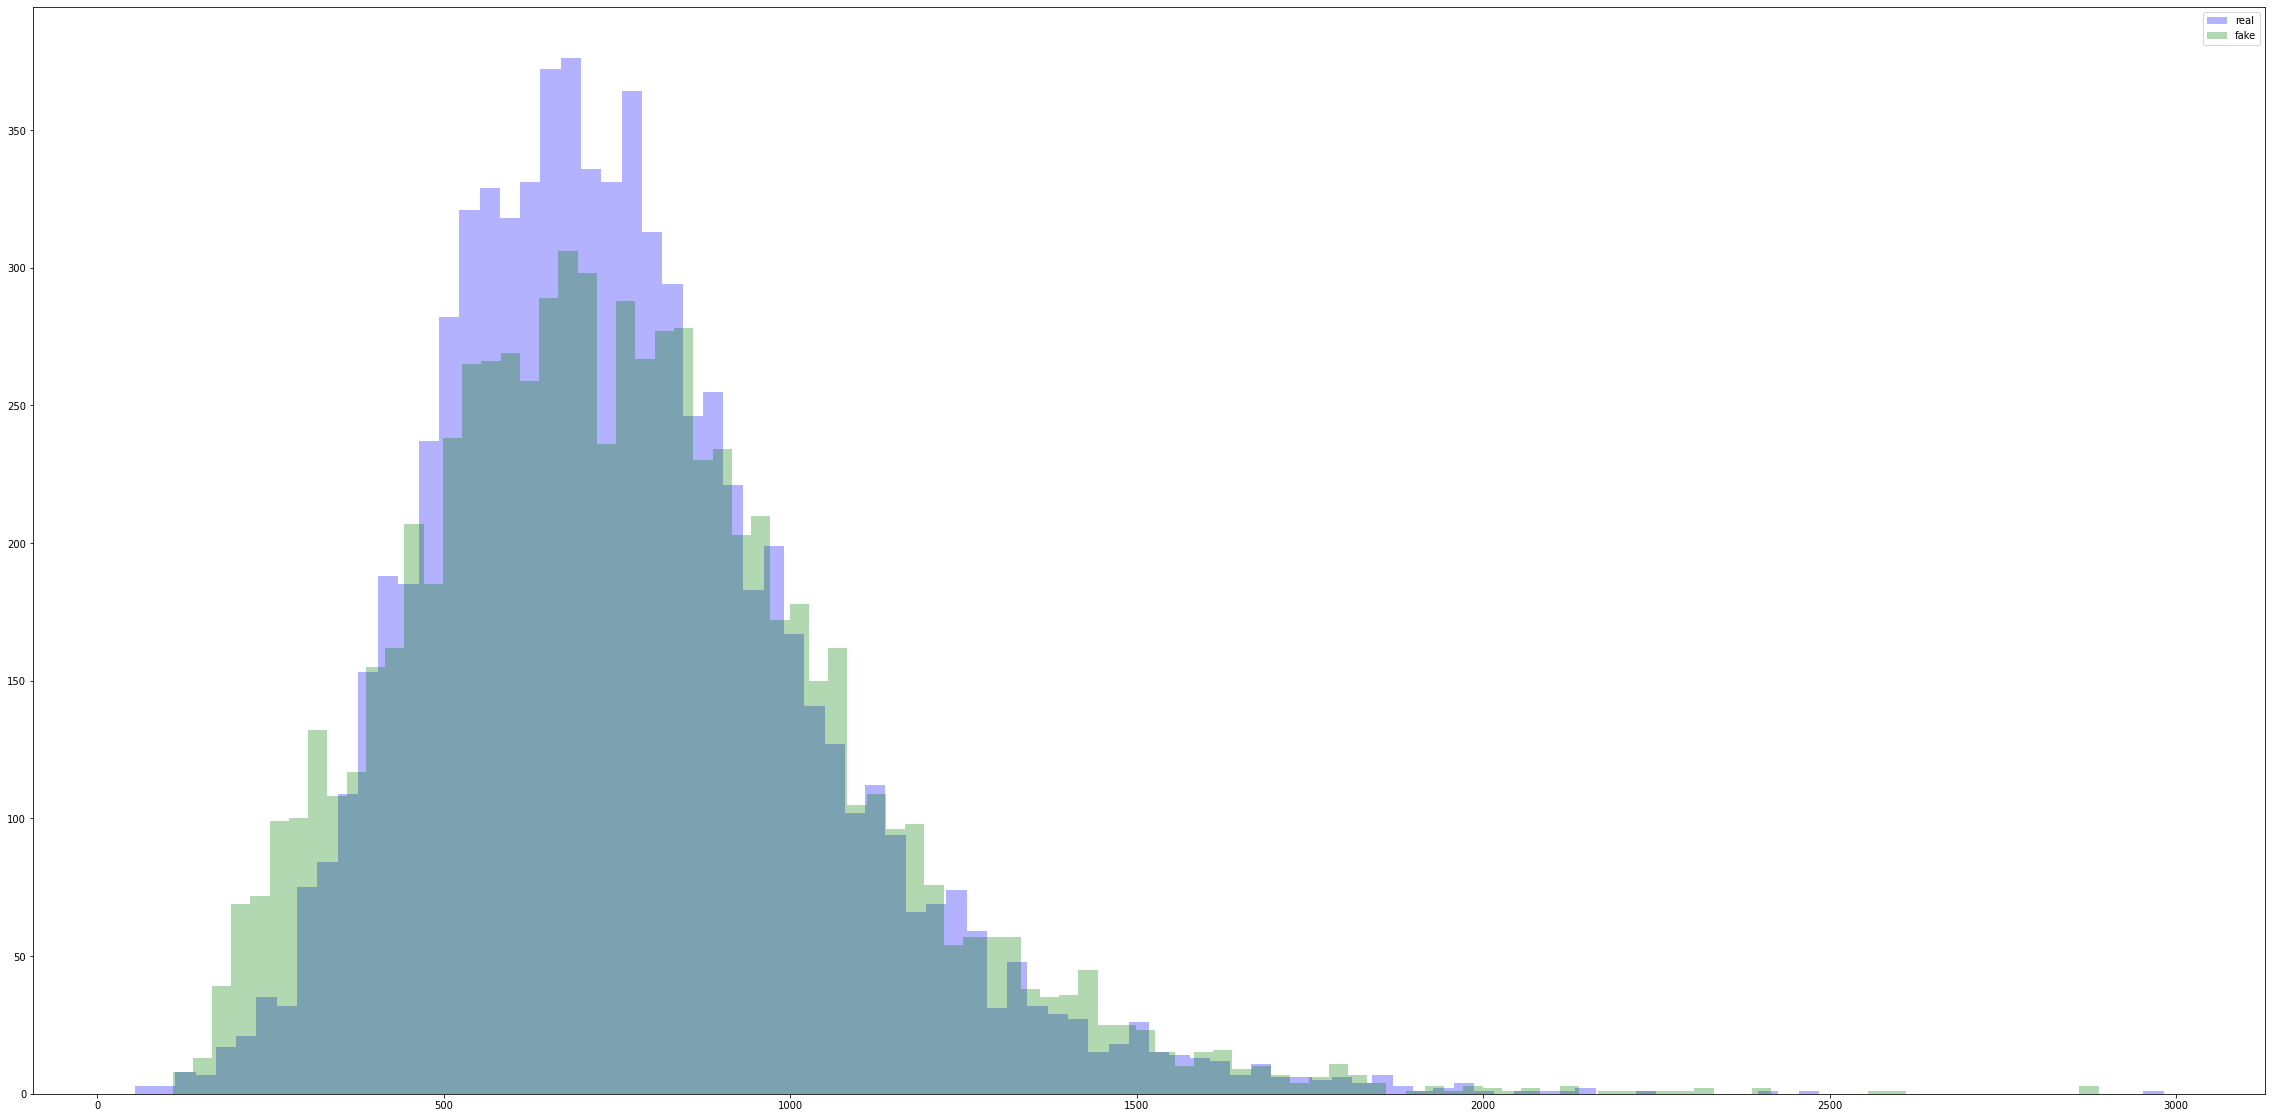

In [7]:
fig , ax = plt.subplots(1, 1, figsize = (40,20), sharey=True)
#labels =['Data scientist', 'Machine learning engineer', 'Software engineer', 'Consultant'] 
colors = ["blue","green"]
labels = ["real", "fake"]
bins = 100

for i, l in enumerate(labels):
    ax.hist(train[train["label_fnn"]==l]["length"],bins=bins,alpha=0.3, color=colors[i], label=labels[i]) 
    ax.legend(loc=0)

In [8]:
fake = train[train["label_fnn"]=='fake']
real = train[train["label_fnn"]=="real"]

In [9]:
fake["speaker"].value_counts()

Donald Trump         520
Facebook posts       450
Viral image          311
Bloggers             278
Chain email          153
                    ... 
Mo Brooks              1
Ron Tusler             1
Miami-Dade County      1
John Chiang            1
Katrina Pierson        1
Name: speaker, Length: 2310, dtype: int64

In [10]:
real["speaker"].value_counts()

Barack Obama         326
Donald Trump         198
Hillary Clinton      142
Bernie Sanders       109
Scott Walker          97
                    ... 
Alan  Essig            1
Ellen Qualls           1
Larry Gonzales         1
Alexander Snitker      1
John Loud              1
Name: speaker, Length: 2570, dtype: int64

In [11]:
fake_sentences = fake["fullText_based_content"].tolist()

In [12]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)  # 出現頻度上位{num_words}だけを用いる
tokenizer.fit_on_texts(fake_sentences)
print(list(tokenizer.word_index)[:10] ) # 学習された辞書（出現頻度順）


['the', 'to', 'of', 'a', 'in', 'and', 'that', 'for', 'is', 'on']


In [13]:
print(list(tokenizer.word_index)[:100] )

['the', 'to', 'of', 'a', 'in', 'and', 'that', 'for', 'is', 'on', 'said', 'it', 'was', 'as', 'by', 'not', 'we', 'with', 'he', 'from', 'but', 'at', 'have', 'an', 'are', 'be', 'about', 'has', 'this', 'or', 'would', 'his', 'state', 'they', 'more', 'who', 'percent', 'one', 'were', 'which', 'than', 'tax', 'so', 'if', 'had', 'when', 'no', 'their', 'people', 'other', 'i', 'you', 'been', 'there', 'health', 'what', 'out', 'also', 'law', 'all', 'year', 'up', 'new', 'some', 's', 'u', 'claim', 'our', 'its', 'will', 'obama', 'president', 'states', 'did', 'she', 'bill', 'million', 'years', 'trump', 'those', 'federal', 'two', '000', 'us', 'campaign', 'because', 'any', 'time', 'government', 'after', 'news', 'care', '1', 'over', 'house', 'could', 'can', 'it’s', 'first', 'only']


In [14]:
import string 

def remove_punct(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [15]:
train["full_text"] = train["fullText_based_content"].apply(remove_punct)

In [16]:
def create_corpus(target):
  corpus = []

  for x in train[train["label_fnn"]==target]["full_text"].str.split():
    for i in x:
      corpus.append(i)
  
  return corpus 

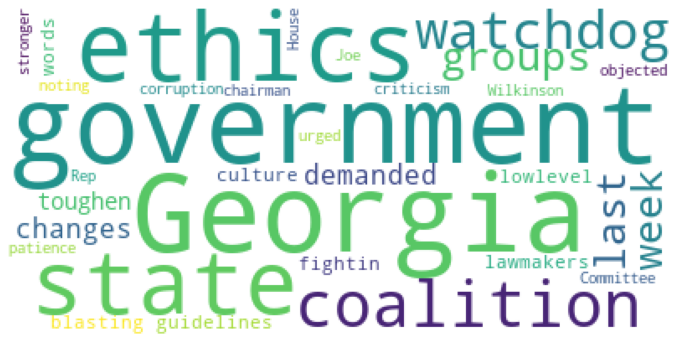

In [17]:
from wordcloud import WordCloud
 
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 80
                         ).generate(" ".join(create_corpus("fake")[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

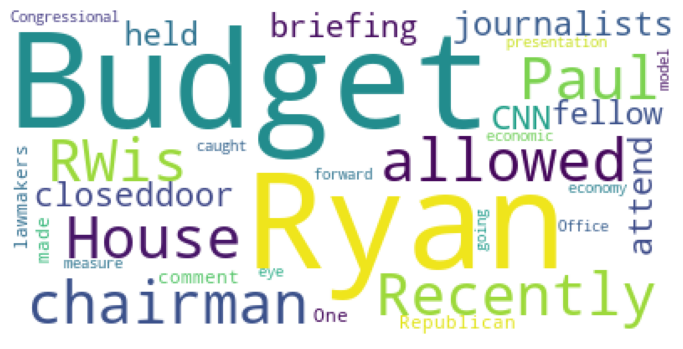

In [18]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 80
                         ).generate(" ".join(create_corpus("real")[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [19]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
  count_vectorizer = CountVectorizer()

  emb = count_vectorizer.fit_transform(data)

  return emb, count_vectorizer 

list_corpus = train["full_text"].tolist()

def encode(label):
  if label == "fake":
    return 1
  elif label == "real":
    return 0 

#list_labels = train["label_fnn"].tolist() 


In [20]:
train['flg'] = train["label_fnn"].apply(encode)
list_labels = train['flg'].tolist() 

print(list_labels[0:10])

[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [21]:
counts, count_vectorizer = cv(list_corpus)

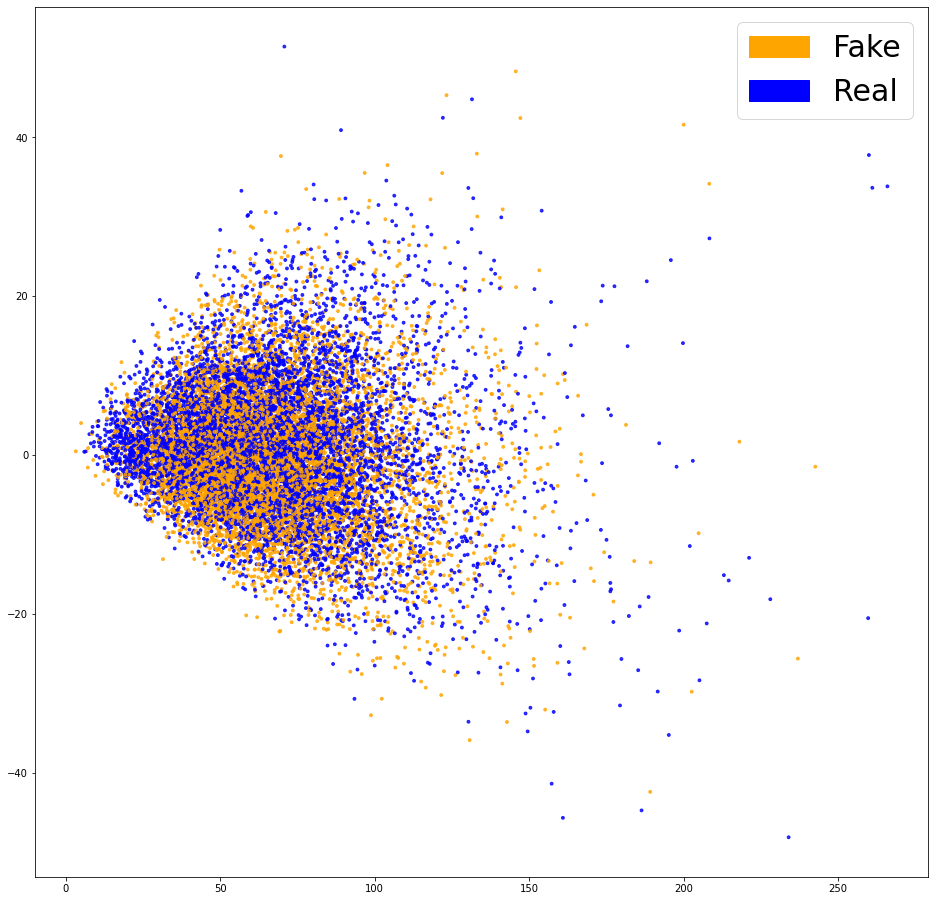

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Fake')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(counts, list_labels)
plt.show()

In [23]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

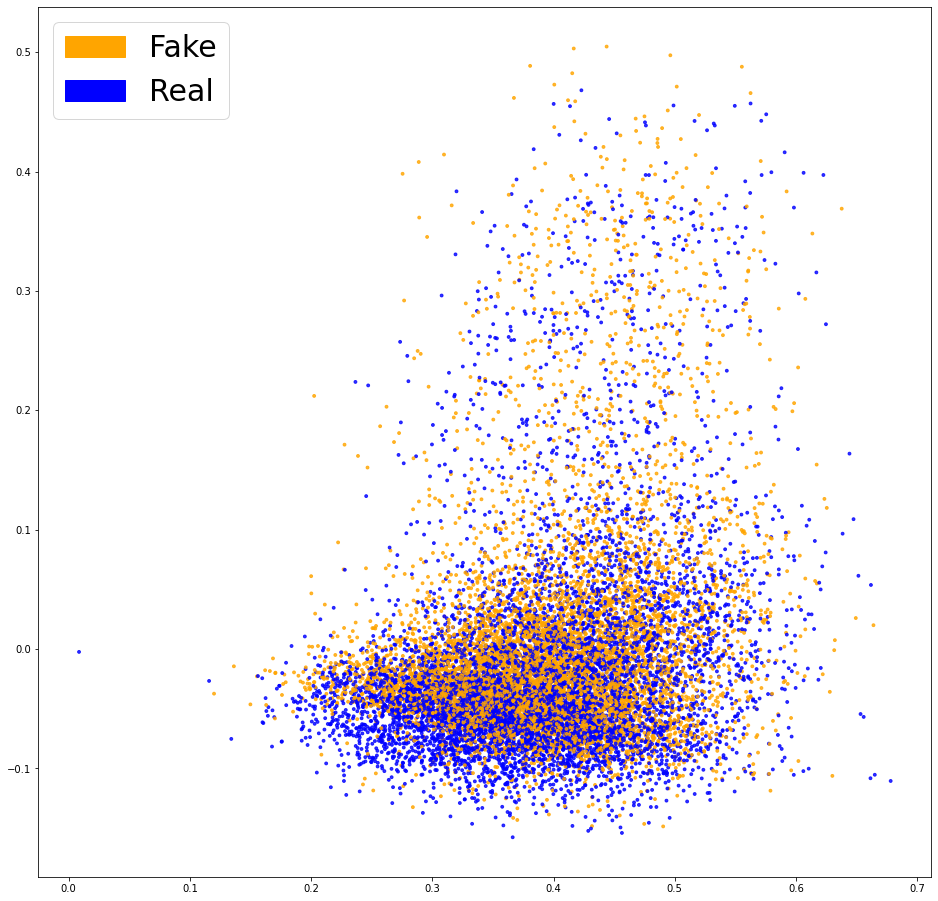

In [24]:
X_train_tfidf, tfidf_vectorizer = tfidf(train["full_text"])
#X_test_tfidf = tfidf_vectorizer.transform(X_test)

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, list_labels)
plt.show()


In [26]:
train["paragraph_based_content"].iloc[0]

'[\'A coalition of government watchdog groups last week demanded changes to toughen Georgia’s ethics guidelines, blasting state lawmakers with fightin’ words like there’s a culture of "low-level corruption" in Georgia government.\', \'State Rep. Joe Wilkinson, chairman of the House Ethics Committee, objected to the criticism. He urged patience, noting stronger ethics guidelines just took effect this year. He also pointed out that a national organization ranked Georgia as having one of the toughest ethics laws in the nation, according to a Jan. 20 article in The Atlanta Journal-Constitution.\', \'We asked the representative about it. Wilkinson said the Washington-based Center for Public Integrity came up with the ranking on where Georgia stands on ethics.\', \'"If I didn’t believe it was true, I wouldn’t have said it," said Wilkinson, a Republican from Fulton County.\', \'One PolitiFact Georgia reader was dubious about Wilkinson’s claim.\', \'"He told me the same thing personally when I

In [56]:
def count_vague_words(data):
  
  data["count_maybe"] = data["full_text"].apply(lambda x: x.lower().count('maybe'))
  data["count_probably"] = data["full_text"].apply(lambda x: x.lower().count('probably'))
  data["count_perhaps"] = data["full_text"].apply(lambda x: x.lower().count('perhaps'))

  return data

In [29]:
train["count_maybe"] = train["full_text"].apply(maybe)
train["count_maybe"].value_counts() 

0     14656
1       473
2        66
3        15
15        1
4         1
Name: count_maybe, dtype: int64

In [57]:
train= count_vague_words(train)
train["count_maybe"].value_counts()

0     14656
1       473
2        66
3        15
15        1
4         1
Name: count_maybe, dtype: int64

In [60]:
train.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn,length,full_text,flg,count_maybe,"(count_maybe, count_probably, count_perhaps)",count_probably,count_perhaps
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake,661,A coalition of government watchdog groups last...,1,0,"[0, 0, 1]",0,1
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake,970,As Supreme Court justices embarked on three da...,1,0,"[0, 0, 0]",0,0
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake,716,Heres a new one The Senate budget committee ch...,1,0,"[0, 0, 0]",0,0
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real,1163,Recently House Budget chairman Paul Ryan RWis ...,0,0,"[0, 1, 0]",1,0
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake,588,The millionaires’ tax proposal made its latest...,1,0,"[0, 0, 0]",0,0


In [59]:
train["full_text"].iloc[0]

'A coalition of government watchdog groups last week demanded changes to toughen Georgia’s ethics guidelines blasting state lawmakers with fightin’ words like there’s a culture of lowlevel corruption in Georgia government\nState Rep Joe Wilkinson chairman of the House Ethics Committee objected to the criticism He urged patience noting stronger ethics guidelines just took effect this year He also pointed out that a national organization ranked Georgia as having one of the toughest ethics laws in the nation according to a Jan 20 article in The Atlanta JournalConstitution\nWe asked the representative about it Wilkinson said the Washingtonbased Center for Public Integrity came up with the ranking on where Georgia stands on ethics\nIf I didn’t believe it was true I wouldn’t have said it said Wilkinson a Republican from Fulton County\nOne PolitiFact Georgia reader was dubious about Wilkinson’s claim\nHe told me the same thing personally when I was at the Capitol last year said Tom Tortorici 